In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import cmath
from numpy import linalg
from scipy.linalg import solve_banded

## Номер 1

In [2]:
def simple_iteration(f, x0, eps = 1e-5, maxiter = 1000):
    listoferrs = []
    dots = []
    for i in range(1, maxiter + 1):
        x0, x = f(x0), x0
        dots.append(x)
        listoferrs.append(np.log(np.abs(x - x0)))
        if (np.abs(x - x0) < eps):
            break
    return dots, listoferrs, i

In [3]:
x0 = 1
dots1, errors1, nit1 = simple_iteration(lambda x: x + (np.cos(x + 1)) / np.sin(x), x0 = x0)
dots2, errors2, nit2 = simple_iteration(lambda x: (x + 2 / x) / 2, x0 = x0)

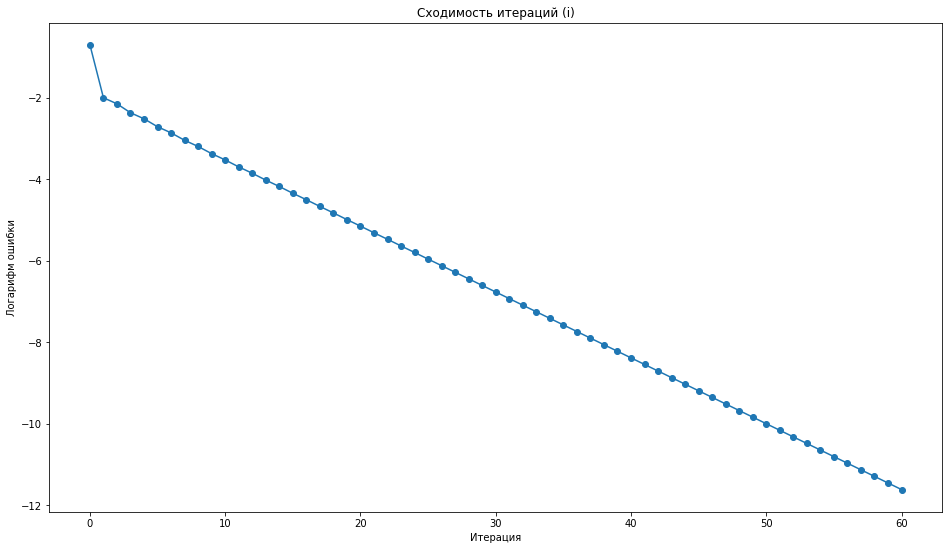

In [4]:
fig = plt.figure(figsize=(16, 9))
plt.plot(range(nit1), errors1, '-o')
plt.xlabel('Итерация')
plt.ylabel('Логарифм ошибки')
plt.title('Cходимость итераций (i)')
plt.show()

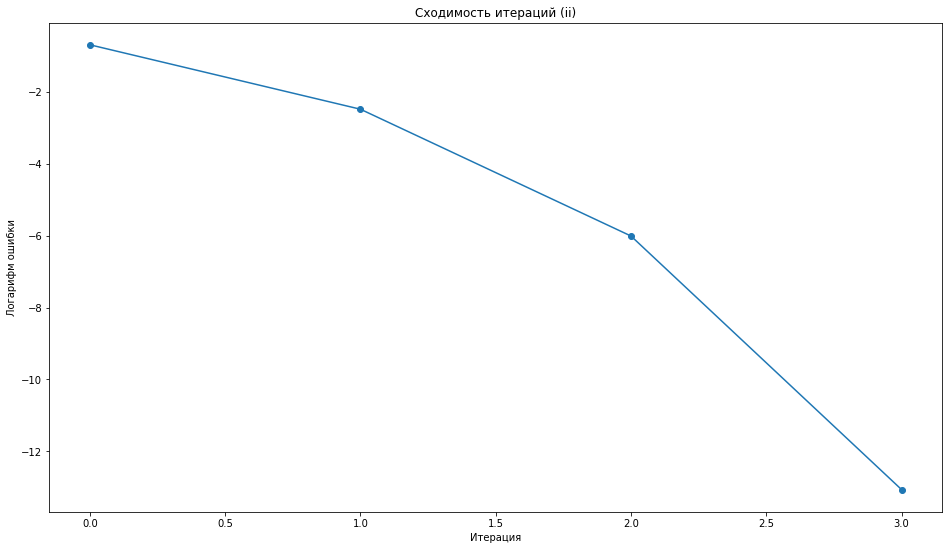

In [5]:
fig = plt.figure(figsize=(16, 9))
plt.plot(range(nit2), errors2, '-o')
plt.xlabel('Итерация')
plt.ylabel('Логарифм ошибки')
plt.title('Cходимость итераций (ii)')
plt.show()

## Номер 2

In [6]:
rnd = np.random.RandomState(1234)
n = 10
A = rnd.uniform(size = (n, n)) + np.diag([15] * n)
b = rnd.uniform(size = n)

In [7]:
def construct_B_c(A, b):
    diag = A.diagonal()
    D = np.diag(diag)
    D_inv = np.diag(1 / diag)
    B = D_inv @ (D - A)
    c = D_inv @ b
    return B, c

In [8]:
B, c = construct_B_c(A, b)

In [9]:
norm_B_2 = np.linalg.norm(B, ord = 2)
norm_B_inf = np.linalg.norm(B, ord=float('inf'))
print("2 норма матрицы B:", np.linalg.norm(B, ord=2))
print("inf норма матрицы B:", np.linalg.norm(B, ord=np.inf))

2 норма матрицы B: 0.31853784252598116
inf норма матрицы B: 0.3969558732098327


In [10]:
def jacobi_iteration(B, c, x0, eps = 1e-5, maxiter = 500):
    x = x0.copy()
    n_iter = 0
    
    for i in range(maxiter):
        n_iter += 1
        x1 = x.copy()
        x = B @ x1 + c
        if np.linalg.norm(x - x1) < eps:
            break
            
    return x, n_iter

In [11]:
x0 = np.ones(n)
xx, niter = jacobi_iteration(B, c, x0, eps = 1e-10)
print(xx)
print(abs(A @ xx - b))

[ 0.03919429  0.03780037  0.04283232  0.02365951  0.05745031 -0.00030244
 -0.00577279  0.03177549 -0.00422849  0.05284648]
[7.62332419e-11 6.65594246e-11 6.30351327e-11 7.85705945e-11
 4.14166479e-11 6.66706690e-11 4.21568683e-11 5.15577581e-11
 6.96806501e-11 6.05883121e-11]


In [12]:
for i in range(1, 15, 2):
    print("i = ", 15 - i)
    A_new = A - np.diag([i]*n)
    
    B_new, c_new = construct_B_c(A_new, b)
    
    xx, n_iter = jacobi_iteration(B_new, c_new, x0)
    
    print("2 норма матрицы B:", np.linalg.norm(B_new, ord=2))
    print("inf норма матрицы B:", np.linalg.norm(B_new, ord=np.inf))
    print("Итераций:", n_iter)
    print()

i =  14
2 норма матрицы B: 0.3406178896769193
inf норма матрицы B: 0.4250216549874149
Итераций: 13

i =  12
2 норма матрицы B: 0.39544749436992493
inf норма матрицы B: 0.4950199777696716
Итераций: 15

i =  10
2 норма матрицы B: 0.4713391399140566
inf норма матрицы B: 0.5926207973337314
Итераций: 18

i =  8
2 норма матрицы B: 0.5833393274617781
inf норма матрицы B: 0.7381605236308574
Итераций: 23

i =  6
2 норма матрицы B: 0.7653600109101562
inf норма матрицы B: 0.9784562720585108
Итераций: 41

i =  4
2 норма матрицы B: 1.11349777187279
inf норма матрицы B: 1.4507107755068966
Итераций: 500

i =  2
2 норма матрицы B: 2.054236236105385
inf норма матрицы B: 2.804132947095354
Итераций: 500



## Номер 3

In [13]:
nf = lambda x: 1 + np.exp(-3 * (x - 5)**2)
n = 100 
dx = 10. / n
Set = np.linspace(start=0, stop=10, num=n, dtype=float)
phi = np.zeros(n)

In [14]:
def Newton_iteration(f, f_derivative, x0, eps=1e-5, maxiter=100):
    
    temp = 0
    x = x0
    
    for i in range(maxiter):
        temp += 1
        x_temp = x
        x = x_temp - f(x_temp)/ f_derivative(x_temp)
        if abs(x - x_temp) <= eps:
            break
            
    return x, temp

In [15]:
def G(Set, phi, dx):
    
    n = phi.shape[0] - 2
    g = np.zeros(n)
    
    for i in range(1, n + 1):
        g[i - 1] = np.exp(phi[i]) - nf(Set[i]) - (phi[i+1] + phi[i-1] - 2*phi[i])/dx**2
        
    return g

In [16]:
def Jacobi(phi, dx):
    
    n = phi.shape[0] - 2
    Jac = np.zeros((n, n))
    
    for i in range(1, n - 1):
        Jac[i, i - 1] = 1/dx**2
        Jac[i, i] = -2/dx**2 - np.exp(phi[i + 1])
        Jac[i, i + 1] = 1/dx**2
        
    Jac[n-1][n-2] = 1/dx**2
    Jac[n-1][n - 1] = -2/dx**2 - np.exp(phi[n])
    
    Jac[0][0] = -2/dx**2 - np.exp(phi[1])
    Jac[0][1] = 1/dx**2

    return Jac

In [17]:
def Newton(phi, eps=1e-5, maxiter=50):
    
    n = phi.shape[0]
    e = np.zeros(n-2)
    temp = 0
    
    for i in range(maxiter):
        temp += 1
        J = Jacobi(phi, dx)
        e = np.linalg.solve(J, G(Set, phi, dx))
        phi[1:n-1] = phi[1:n-1] + e
        if np.linalg.norm(e) < eps:
            break
            
    return phi, temp

In [18]:
phi = np.zeros(n)
Solution, Iterations = Newton(phi, eps=1e-10)
Iterations

5

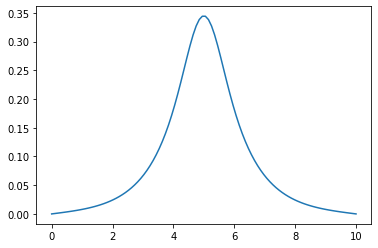

In [19]:
plt.plot(Set, Solution)

## Номер 4

In [20]:
def Newton_Itr(f, f_derivative, x0, epsilon):
    
    temp = 30
    xn = x0
    
    for n in range(0, temp):
        f_xn = f(xn)
        
        if abs(f_xn) < epsilon:
            return xn
        f_derivative_xn = f_derivative(xn)
        
        if f_derivative_xn == 0:
            return None
        
        xn = xn - f_xn/f_derivative_xn
    return None

In [21]:
Sol_1 = cmath.exp(2*(0 + 1j)*cmath.pi*0/3)
Sol_2 = cmath.exp(2*(0 + 1j)*cmath.pi/3)
Sol_3 = cmath.exp(2*(0 + 1j)*cmath.pi*2/3)

print(Sol_1, Sol_2, Sol_3)

(1+0j) (-0.4999999999999998+0.8660254037844388j) (-0.5000000000000004-0.8660254037844384j)


In [22]:
func = lambda x: x**3 - 1
func_derivative = lambda x: 3*x**2
eps = 1e-10

Pool_1 = []
Pool_2 = []
Pool_3 = []

Re_Sol = []
Im_Sol = []


for Re in np.arange(-6, 6, 0.1):
    for Im in np.arange(-6, 6, 0.1):
        
        x = complex(Re, Im)
        Sol = Newton_Itr(func, func_derivative, x, eps)

        if (Sol != None):
            if abs(Sol - Sol_1) < eps:
                Pool_1.append(x)
            if abs(Sol - Sol_2) < eps:
                Pool_2.append(x)
            if abs(Sol - Sol_3) < eps:
                Pool_3.append(x)
            else:
                continue

for a in [Pool_1, Pool_2, Pool_3]:
    Re_Sol.append([x.real for x in a])
    Im_Sol.append([x.imag for x in a])

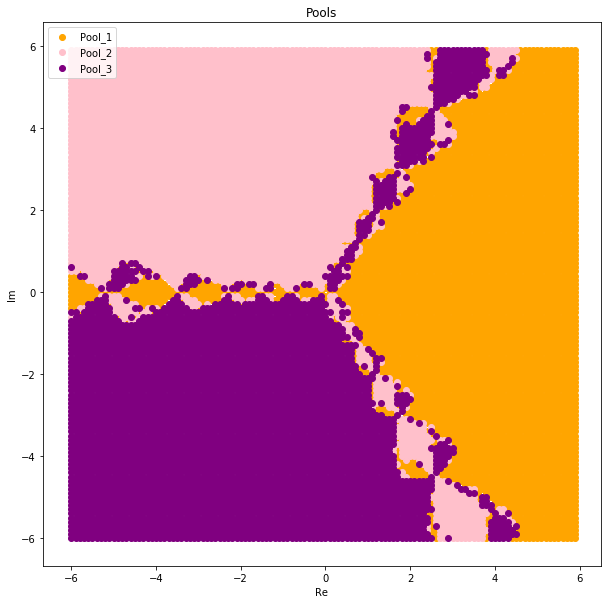

In [23]:
_, ax = plt.subplots(figsize = (10, 10))


types = ['Pool_1', 'Pool_2', 'Pool_3']
colors = ['orange', 'pink', 'purple']

for i in range(3):
    ax.scatter(Re_Sol[i], Im_Sol[i], c = colors[i], label = types[i])

ax.set_xlabel('Re')
ax.set_ylabel('Im')
ax.set_title('Pools')
ax.legend()
plt.show()